This is my first attempt on a simple linear regression model to predict housing prices. Still working on improving the accuracy of the model though. This is very simple code with not much functionality. 

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [7]:
!pip install subprocess

ERROR: Could not find a version that satisfies the requirement subprocess (from versions: none)
ERROR: No matching distribution found for subprocess


In [27]:
!pip install sklearn.cross_validation

ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
# Any results you write to the current directory are saved as output. Does subprocess look for newer modules?

In [41]:
import sys

In [42]:
#Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)
# what is the printoptions code? I understand it determines the way floating point numbers, arrays and other NumPy objects are displayed.

In [17]:
#Importing DataSet 
house = pd.read_csv('kc_house_data.csv')
space=house['sqft_living']
price=house['price']

In [19]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
space.head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [43]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)
#why do we reshape space?
print(x)

[[ 1180]
 [ 2570]
 [  770]
 [ 1960]
 [ 1680]
 [ 5420]
 [ 1715]
 [ 1060]
 [ 1780]
 [ 1890]
 [ 3560]
 [ 1160]
 [ 1430]
 [ 1370]
 [ 1810]
 [ 2950]
 [ 1890]
 [ 1600]
 [ 1200]
 [ 1250]
 [ 1620]
 [ 3050]
 [ 2270]
 [ 1070]
 [ 2450]
 [ 1710]
 [ 2450]
 [ 1400]
 [ 1520]
 [ 2570]
 [ 2320]
 [ 1190]
 [ 2330]
 [ 1090]
 [ 2060]
 [ 2300]
 [ 1660]
 [ 2360]
 [ 1220]
 [ 2620]
 [ 2570]
 [ 4220]
 [ 3595]
 [ 1570]
 [ 1280]
 [ 3160]
 [  990]
 [ 2290]
 [ 1250]
 [ 2753]
 [ 1190]
 [ 3150]
 [ 1410]
 [ 1980]
 [ 2730]
 [ 2830]
 [ 2250]
 [ 2420]
 [ 3250]
 [ 1850]
 [ 2150]
 [ 1260]
 [ 2519]
 [ 1540]
 [ 1660]
 [ 2770]
 [ 2720]
 [ 2240]
 [ 1000]
 [ 3200]
 [ 4770]
 [ 1260]
 [ 2750]
 [ 2380]
 [ 1790]
 [ 3430]
 [ 1760]
 [ 1040]
 [ 1410]
 [ 3450]
 [ 2350]
 [ 1900]
 [ 2020]
 [ 1680]
 [  960]
 [ 2140]
 [ 2660]
 [ 2770]
 [ 1610]
 [ 1030]
 [ 1980]
 [ 3520]
 [ 1200]
 [ 1580]
 [ 1580]
 [ 3300]
 [ 1960]
 [ 1160]
 [ 1810]
 [ 2320]
 [ 2070]
 [ 1980]
 [ 2190]
 [ 2920]
 [ 1210]
 [ 2340]
 [ 1670]
 [ 1240]
 [ 3140]
 [ 2030]
 [ 2310]
 

In [44]:
print(y)

[ 221900.  538000.  180000.  604000.  510000. 1225000.  257500.  291850.
  229500.  323000.  662500.  468000.  310000.  400000.  530000.  650000.
  395000.  485000.  189000.  230000.  385000. 2000000.  285000.  252700.
  329000.  233000.  937000.  667000.  438000.  719000.  580500.  280000.
  687500.  535000.  322500.  696000.  550000.  640000.  240000.  605000.
  625000.  775000.  861990.  685000.  309000.  488000.  210490.  785000.
  450000. 1350000.  228000.  345000.  600000.  585000.  920000.  885000.
  292500.  301000.  951000.  430000.  650000.  289000.  505000.  549000.
  425000.  317625.  975000.  287000.  204000. 1325000. 1040000.  325000.
  571000.  360000.  349000.  832500.  380000.  480000.  410000.  720000.
  390000.  360000.  355000.  356000.  315000.  940000.  305000.  461000.
  215000.  335000.  243500. 1099880.  153000.  430000.  700000.  905000.
  247500.  199000.  314000.  437500.  850830.  555000.  699950. 1088000.
  290000.  375000.  460000.  188500.  680000.  4700

In [33]:
space.head()

0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64

In [45]:
from sklearn import cross_validation
#old package so need to use model.selection

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\Perrine Mignot\anaconda3\envs\python 37\lib\site-packages\sklearn\__init__.py)

In [76]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

In [77]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression(normalize=True)
regressor.fit(xtrain, ytrain)

LinearRegression(normalize=True)

In [78]:
#Predicting the prices
pred = regressor.predict(xtest)

In [79]:
from sklearn.preprocessing import MinMaxScaler


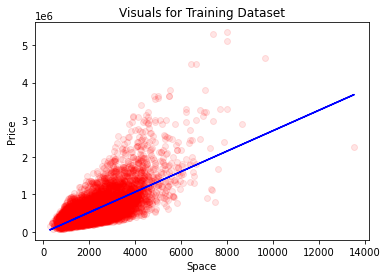

In [80]:
#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red',alpha=0.1)
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [81]:
regressor.coef_

array([273.80181792])

In [82]:
pred

array([ 362496.90888926, 1249614.79894487,  365234.92706844,
        280356.36351374,  841650.09024645,  422733.3088313 ,
        441899.43608559,  665869.32314284,  644512.78134521,
       1192116.41718201,  617132.59955337,  441899.43608559,
        250238.16354271,  337854.7452766 ,  841650.09024645,
        304998.52712639,  389877.0906811 ,  554158.18143214,
        225595.99993006,  346068.79981415,  428209.34518967,
        578800.34504479,  491183.7633109 ,  272142.30897618,
        619870.61773255,  272142.30897618,  389877.0906811 ,
        419995.29065212,  548682.14507377,  433685.38154804,
        537730.07235703,  524039.98146111,  671892.96313705,
        882720.36293421,  811531.89027543,  469279.61787743,
        315950.59984313,  529516.01781948,  682845.03585378,
        266666.27261782,  294046.45440966,  351544.83617252,
        630822.69044929,  696535.1267497 ,  614394.58137418,
        619870.61773255,  482969.70877335,  830698.01752972,
        395353.12703946,

In [83]:
ytest

array([ 297000., 1578000.,  562100.,  631500.,  780000.,  485000.,
        340000.,  335606.,  425000.,  490000.,  732000.,  389700.,
        450000.,  357000.,  960000.,  257000.,  448000.,  610000.,
        230950.,  377500.,  375000.,  410000.,  459000.,  190000.,
        585000.,  280000.,  500000.,  465000.,  802000.,  440000.,
       1452000.,  575000.,  390000., 1210000.,  858000.,  453000.,
        245000.,  279000.,  482000.,  228500.,  397990.,  400000.,
        325000.,  699000.,  555000.,  687000.,  310000.,  400000.,
        525000., 1035000.,  255000.,  245000., 1325000.,  309212.,
        782000.,  553000.,  390500.,  330000.,  425000.,  552500.,
        308000.,  320000.,  382000.,  435000.,  372000., 1381000.,
        349950.,  350000., 1315000.,  255000.,  405000.,  442500.,
        772000.,  767450.,  832000.,  835000., 2000000.,  460000.,
        500000.,  620000.,  605000.,  790000., 1749000.,  513000.,
        600000.,  680000.,  350000.,  332000.,  605000.,  3250

In [84]:
from sklearn.metrics import mean_squared_error , average_precision_score 
print(mean_squared_error(ytest,pred))
print(average_precision_score(ytest,pred))

72169122334.16644


ValueError: multiclass format is not supported

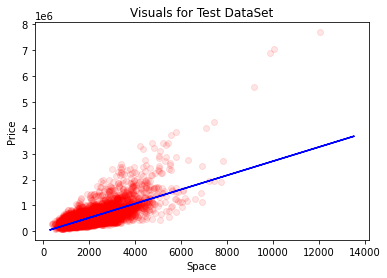

In [85]:
#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red',alpha=0.1)
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [ ]:
#how does this help us knowing the optimal price?